In [2]:
from transformers import AutoTokenizer, AutoModel
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

In [3]:
# example sentences
sentences = [
    "I love eating pizza.",
    "Pizza is my favorite food.",
    "The weather today is beautiful.",
    "It's raining cats and dogs outside.",
    "Dogs are the best pets.",
    "Cats make for cuddly companions."
]


In [4]:
# Tokenize and encode sentences for the model
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)


In [5]:
print(model_output.last_hidden_state.shape)

torch.Size([6, 11, 384])


In [6]:
print(model_output.last_hidden_state[0])

tensor([[-0.3811,  0.3611,  0.1014,  ...,  0.3597, -0.2890, -0.3434],
        [ 0.1423, -0.4193,  0.2515,  ...,  0.6906, -0.8627, -1.5261],
        [-0.4461,  0.2012,  0.6818,  ...,  1.2945,  1.1702, -0.3048],
        ...,
        [-0.0490, -0.1900,  0.3440,  ...,  0.3841, -0.3651, -0.3669],
        [-0.0742, -0.1368,  0.2802,  ...,  0.4178, -0.3834, -0.2065],
        [-0.0538, -0.1496,  0.2658,  ...,  0.4124, -0.3144, -0.1891]])


In [7]:
print(encoded_input)

{'input_ids': tensor([[  101,  1045,  2293,  5983, 10733,  1012,   102,     0,     0,     0,
             0],
        [  101, 10733,  2003,  2026,  5440,  2833,  1012,   102,     0,     0,
             0],
        [  101,  1996,  4633,  2651,  2003,  3376,  1012,   102,     0,     0,
             0],
        [  101,  2009,  1005,  1055, 24057,  8870,  1998,  6077,  2648,  1012,
           102],
        [  101,  6077,  2024,  1996,  2190, 18551,  1012,   102,     0,     0,
             0],
        [  101,  8870,  2191,  2005, 12731, 14141,  2135, 11946,  1012,   102,
             0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1,

In [8]:
# Use mean pooling to get one vector per sentence
embeddings = model_output.last_hidden_state
attention_mask = encoded_input['attention_mask']
mask_expanded = attention_mask.unsqueeze(-1).expand(embeddings.size()).float()
sum_embeddings = torch.sum(embeddings * mask_expanded, 1)
sum_mask = torch.clamp(mask_expanded.sum(1), min=1e-9)
mean_pooled = sum_embeddings / sum_mask


In [9]:
print(mean_pooled.shape)

torch.Size([6, 384])


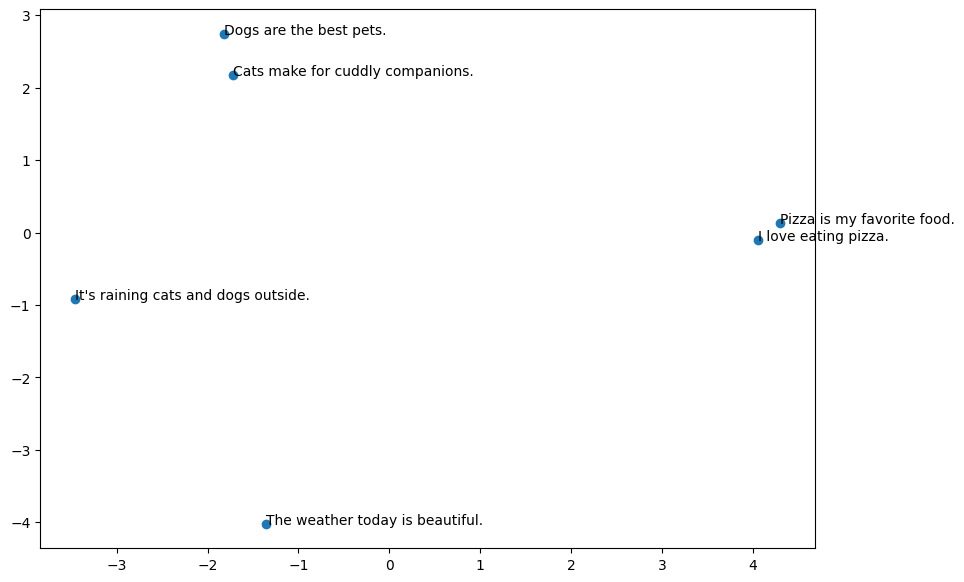

In [10]:
# Reduce dimensionality with PCA
pca = PCA(n_components=2)
embeddings_reduced = pca.fit_transform(mean_pooled)

# Plot the embeddings
plt.figure(figsize=(10, 7))
plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1])
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (embeddings_reduced[i, 0], embeddings_reduced[i, 1]))
plt.show()